In [45]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install -U ucimlrepo 

## Data Loading and Preprocessing

#### • Load the dataset from the provided URL into a suitable data structure (like a pandas Data Frame). 
#### • Clean the data by handling missing values, and normalizing numerical features as needed. 
#### • Split the dataset into training and testing subsets to facilitate model evaluation. 

In [46]:
# Cell 1

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 
  
# metadata 
print(myocardial_infarction_complications.metadata) 
  
# variable information 
print(myocardial_infarction_complications.variables) 

{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'tit

In [47]:
X_backup = X.copy()
y_backup = y.copy()

In [48]:
# Cell 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming myocardial_infarction_complications data is already loaded as X and y

# Display the first few rows of the features

# Display information about the dataset
print("\nDataset Information:")
print(X.info())

print("\nTarget Variables Information:")
print(y.info())

print("First few rows of Features:")
print(X.head())

# Display the first few rows of the target
print("\nFirst few rows of Target:")
print(y.head())

# Display basic statistical details
print("\nStatistical Details:")
print(X.describe())

# Create a list of all columns in the dataset
all_columns = X.columns.tolist()
print("\nList of All Columns:")
print(all_columns)





Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 111 entries, AGE to TRENT_S_n
dtypes: float64(110), int64(1)
memory usage: 1.4 MB
None

Target Variables Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   FIBR_PREDS  1700 non-null   int64
 1   PREDS_TAH   1700 non-null   int64
 2   JELUD_TAH   1700 non-null   int64
 3   FIBR_JELUD  1700 non-null   int64
 4   A_V_BLOK    1700 non-null   int64
 5   OTEK_LANC   1700 non-null   int64
 6   RAZRIV      1700 non-null   int64
 7   DRESSLER    1700 non-null   int64
 8   ZSN         1700 non-null   int64
 9   REC_IM      1700 non-null   int64
 10  P_IM_STEN   1700 non-null   int64
 11  LET_IS      1700 non-null   int64
dtypes: int64(12)
memory usage: 159.5 KB
None
First few rows of Features:
    AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_

In [49]:
# # Assuming 'myocardial_infarction_complications' is your dataset object
# variables_info = myocardial_infarction_complications.variables

# # Set the option to display all columns
# pd.set_option('display.max_columns', None)

# # Set the option to display full column content (if the descriptions are long)
# # pd.set_option('display.max_colwidth', None)

# # Extracting just the variable names and descriptions
# variable_descriptions = variables_info[['name', 'description']]

# # Display the descriptions
# print(variable_descriptions)

# Assuming 'variables_info' is your DataFrame containing the variables
variables_info = myocardial_infarction_complications.variables

# Select only the 'name' and 'description' columns
name_description = variables_info[['name', 'role', 'type', 'demographic', 'description', 'missing_values']]

# Specify the file path where you want to save the CSV
file_path = 'variable_descriptions.csv'

# Append to the CSV file (if the file does not exist, it will be created)
# name_description.to_csv(file_path, mode='a', header=False, index=False)

# If you want to include the header and don't want to append but create a new file or overwrite, use:
name_description.to_csv(file_path, header=True, index=False)


In [44]:
# List of target variables to be used as features
additional_features = ['FIBR_PREDS', 'OTEK_LANC', 'REC_IM', 'A_V_BLOK', 'RAZRIV', 'DRESSLER']

# Add the selected target variables as features to the X DataFrame
# Use .loc to ensure the operation is done without a SettingWithCopyWarning
X.loc[:, additional_features] = y[additional_features]

# Update the y DataFrame to contain only the 'ZSN' target variable
y = y['ZSN']

# Drop the now redundant target variables from the original targets DataFrame if needed
# y = y.drop(columns=additional_features)


KeyError: "None of [Index(['FIBR_PREDS', 'OTEK_LANC', 'REC_IM', 'A_V_BLOK', 'RAZRIV', 'DRESSLER'], dtype='object')] are in the [index]"

In [43]:
# Check the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# View the first few rows of X and y
print("Head of X:")
print(X.head())
print("\nHead of y:")
print(y.head())

# Check the columns in X
print("Columns in X:")
print(X.columns)

# Summary statistics for X
print("\nSummary statistics for X:")
print(X.describe())

# Check for null values in X and y
print("\nNull values in X:")
print(X.isnull().sum())
print("\nNull values in y:")
print(y.isnull().sum())


Shape of X: (1700, 117)
Shape of y: (1700,)
Head of X:
    AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  DLIT_AG  ZSN_A  nr_11  nr_01  nr_02  nr_03  nr_04  nr_07  \
0         0.0      7.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1         0.0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2         0.0      2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3         0.0      3.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4         0.0      7.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   nr_08  np_01  np_04  np_05  np_07  np_08  np_09  np_

In [4]:
# Cell 3

# Check for missing values in each column
missing_values = X.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(X)) * 100

# Print the number and percentage of missing values in each column
print("Missing Values in Each Column:")
print(missing_values)
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

# Identifying columns with a high percentage of missing values (e.g., more than 20%)
high_missing_cols = missing_percentage[missing_percentage > 20]
print("\nColumns with more than 20% missing values:")
print(high_missing_cols)


Missing Values in Each Column:
AGE             8
SEX             0
INF_ANAM        4
STENOK_AN     106
FK_STENOK      73
             ... 
ANT_CA_S_n     13
GEPAR_S_n      17
ASP_S_n        17
TIKL_S_n       16
TRENT_S_n      16
Length: 111, dtype: int64

Percentage of Missing Values in Each Column:
AGE           0.470588
SEX           0.000000
INF_ANAM      0.235294
STENOK_AN     6.235294
FK_STENOK     4.294118
                ...   
ANT_CA_S_n    0.764706
GEPAR_S_n     1.000000
ASP_S_n       1.000000
TIKL_S_n      0.941176
TRENT_S_n     0.941176
Length: 111, dtype: float64

Columns with more than 20% missing values:
IBS_NASL      95.764706
S_AD_KBRIG    63.294118
D_AD_KBRIG    63.294118
GIPO_K        21.705882
K_BLOOD       21.823529
GIPER_NA      22.058824
NA_BLOOD      22.058824
KFK_BLOOD     99.764706
NA_KB         38.647059
NOT_NA_KB     40.352941
LID_KB        39.823529
dtype: float64


In [5]:
# Cell 4

# Drop columns with more than 20% missing values
X_cleaned = X.drop(columns=high_missing_cols.index)

# Verify columns are dropped
print("\nDataset after dropping columns with more than 20% missing values:")
print(X_cleaned.info())

# Create a new list of columns after dropping
new_columns_list = X_cleaned.columns.tolist()
print("\nList of Columns after Dropping High Missing Value Columns:")
print(new_columns_list)

# Filter the columns based on data type being categorical
categorical_columns = X_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_columns)



Dataset after dropping columns with more than 20% missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 100 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            1692 non-null   float64
 1   SEX            1700 non-null   int64  
 2   INF_ANAM       1696 non-null   float64
 3   STENOK_AN      1594 non-null   float64
 4   FK_STENOK      1627 non-null   float64
 5   IBS_POST       1649 non-null   float64
 6   GB             1691 non-null   float64
 7   SIM_GIPERT     1692 non-null   float64
 8   DLIT_AG        1452 non-null   float64
 9   ZSN_A          1646 non-null   float64
 10  nr_11          1679 non-null   float64
 11  nr_01          1679 non-null   float64
 12  nr_02          1679 non-null   float64
 13  nr_03          1679 non-null   float64
 14  nr_04          1679 non-null   float64
 15  nr_07          1679 non-null   float64
 16  nr_08          1679 non-null

In [6]:
# Cell 5

from sklearn.impute import SimpleImputer

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Apply the imputer to our data
X_imputed = pd.DataFrame(imputer.fit_transform(X_cleaned), columns=X_cleaned.columns)

# Verify the imputation
print("\nData after Median Imputation:")
print(X_imputed.info())
print("\nFirst few rows after imputation:")
print(X_imputed.head())

# Check for missing values in each column after imputation
missing_values = X_imputed.isnull().sum()

# Print the number of missing values in each column after Imputation
print("Missing Values in Each Column after Imputation:")
print(missing_values)


Data after Median Imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 100 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            1700 non-null   float64
 1   SEX            1700 non-null   float64
 2   INF_ANAM       1700 non-null   float64
 3   STENOK_AN      1700 non-null   float64
 4   FK_STENOK      1700 non-null   float64
 5   IBS_POST       1700 non-null   float64
 6   GB             1700 non-null   float64
 7   SIM_GIPERT     1700 non-null   float64
 8   DLIT_AG        1700 non-null   float64
 9   ZSN_A          1700 non-null   float64
 10  nr_11          1700 non-null   float64
 11  nr_01          1700 non-null   float64
 12  nr_02          1700 non-null   float64
 13  nr_03          1700 non-null   float64
 14  nr_04          1700 non-null   float64
 15  nr_07          1700 non-null   float64
 16  nr_08          1700 non-null   float64
 17  np_01          1700 

In [7]:
# Check if y is a DataFrame with multiple columns
if isinstance(y, pd.DataFrame):
    # Summing up all missing values across all columns
    total_missing = y.isnull().sum().sum()
else:
    # If y is a Series, just sum the missing values
    total_missing = y.isnull().sum()

print("Total Missing Values in Target Variable:", total_missing)

# Apply imputation if there are missing values
if total_missing > 0:
    # Create an imputer object for the target variable
    target_imputer = SimpleImputer(strategy='most_frequent')

    # If y is a DataFrame, we need to handle all columns
    if isinstance(y, pd.DataFrame):
        y_imputed = pd.DataFrame(target_imputer.fit_transform(y), columns=y.columns)
    else:
        # If y is a Series, reshape it for imputation
        y_imputed = pd.DataFrame(target_imputer.fit_transform(y.values.reshape(-1, 1)), columns=[y.name])

    print("\nTarget Variable after Imputation:")
    print(y_imputed.info())
else:
    print("\nNo imputation needed for target variable.")
    y_imputed = y


Total Missing Values in Target Variable: 0

No imputation needed for target variable.


In [16]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.3, random_state=42)

# Verifying the split
print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)
print(y_train.columns.tolist())



Training Set Shape: (1190, 100)
Testing Set Shape: (510, 100)
['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']


## Data Visualization

### • Generate visual plots (e.g., histograms, bar charts, box plots) to understand the distribution and characteristics of the dataset. 
### • Visualize the class distribution to check for class imbalance and consider strategies like resampling if needed. 


Top Correlated Features:
['n_r_ecg_p_05', 'AGE', 'nr_03', 'MP_TP_POST', 'nr_11', 'n_r_ecg_p_01', 'ritm_ecg_p_02', 'zab_leg_03', 'nr_07', 'NITR_S', 'zab_leg_02', 'ritm_ecg_p_08', 'STENOK_AN', 'GEPAR_S_n', 'SVT_POST', 'LID_S_n', 'ROE', 'n_r_ecg_p_10', 'n_r_ecg_p_08', 'ANT_CA_S_n', 'NA_R_1_n', 'inf_im', 'nr_01', 'n_r_ecg_p_02']

Correlation Matrix for Top Correlated Features:
               n_r_ecg_p_05       AGE     nr_03  MP_TP_POST     nr_11  \
n_r_ecg_p_05       1.000000  0.143981  0.176072    0.574180  0.096272   
AGE                0.143981  1.000000  0.050435    0.137236  0.050179   
nr_03              0.176072  0.050435  1.000000    0.143919 -0.024352   
MP_TP_POST         0.574180  0.137236  0.143919    1.000000  0.097241   
nr_11              0.096272  0.050179 -0.024352    0.097241  1.000000   
n_r_ecg_p_01      -0.038649  0.070658 -0.027320   -0.051068 -0.002180   
ritm_ecg_p_02      0.604914  0.141659  0.140647    0.813791  0.048597   
zab_leg_03         0.146582  0.094582 -

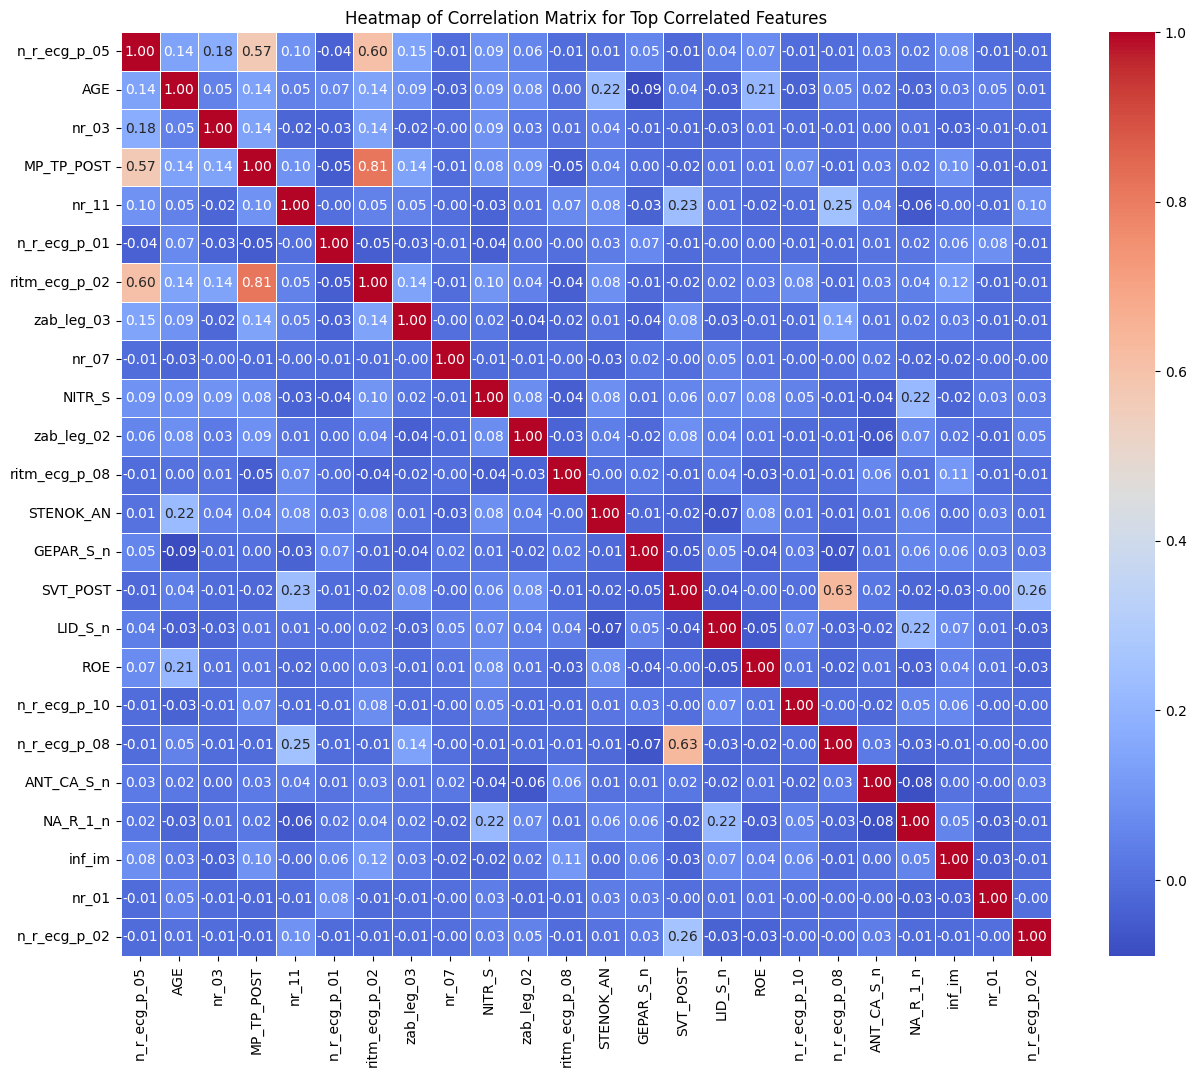

In [9]:
# If y_train is a Series, it should be directly used. If it's a DataFrame, we need to extract the target column.
if isinstance(y_train, pd.DataFrame):
    target_column_name = y_train.columns[0]
    target_data = y_train.iloc[:, 0]
else:
    target_column_name = y_train.name
    target_data = y_train

# Concatenate features and target to calculate correlation
combined_data = pd.concat([X_train, target_data], axis=1)

# Calculate correlation with respect to the target variable
correlation_with_target = combined_data.corr()[target_column_name].sort_values(ascending=False)

# Selecting top correlated features (excluding the target itself)
top_correlated_features = correlation_with_target.nlargest(25).index.tolist()
top_correlated_features.remove(target_column_name)  # Remove the target variable from the list

print("\nTop Correlated Features:")
print(top_correlated_features)

# Create a correlation matrix for the top correlated features
top_features_data = combined_data[top_correlated_features]
top_features_correlation_matrix = top_features_data.corr()

# Print the correlation matrix for top features
print("\nCorrelation Matrix for Top Correlated Features:")
print(top_features_correlation_matrix)

# Plot the heatmap for the correlation matrix of top features
plt.figure(figsize=(15, 12))
sns.heatmap(top_features_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Top Correlated Features')
plt.show()


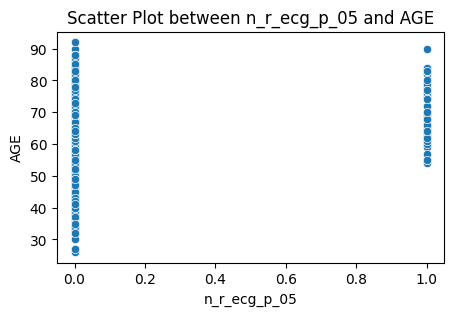

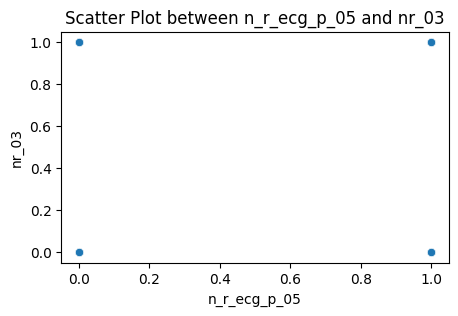

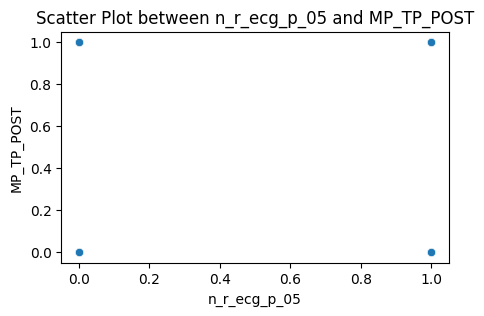

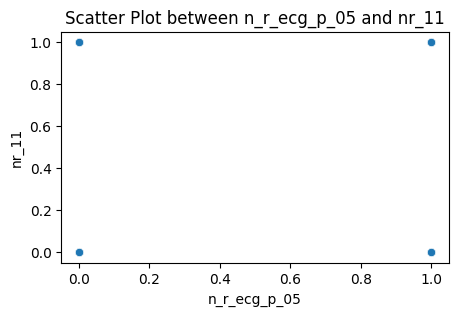

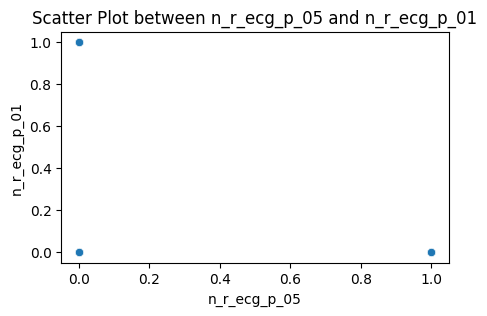

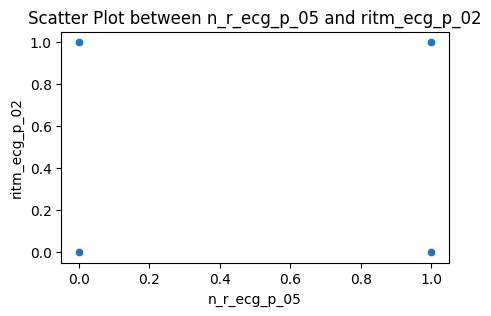

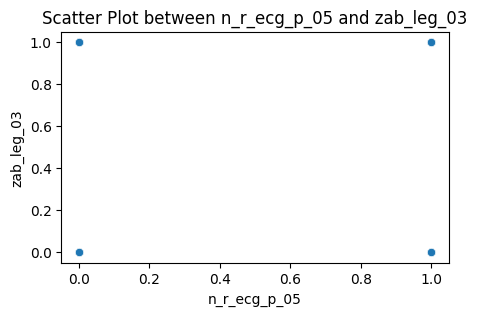

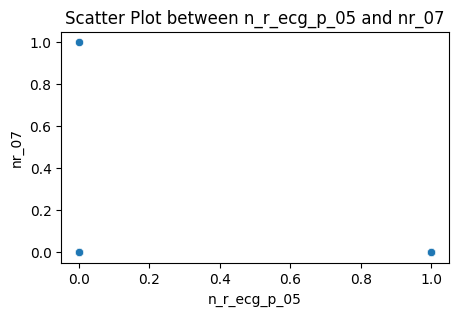

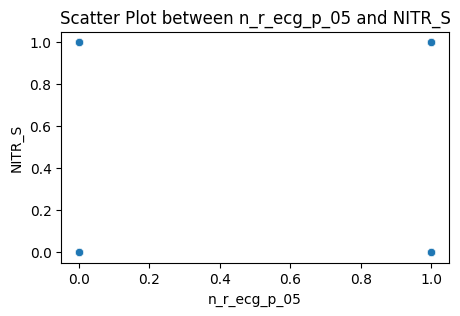

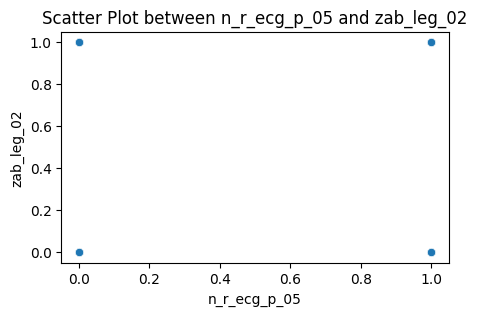

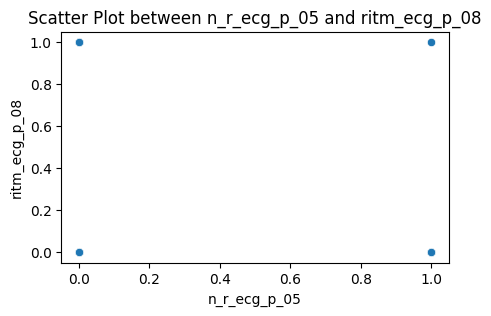

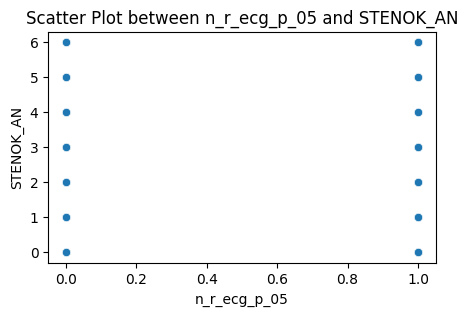

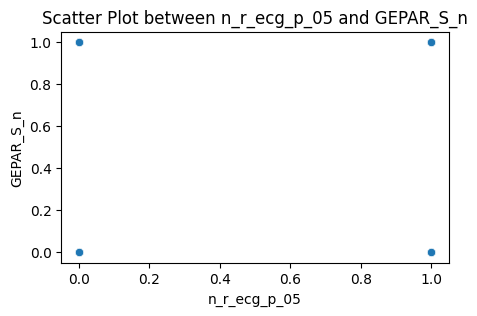

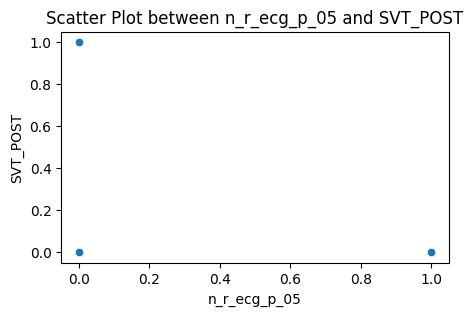

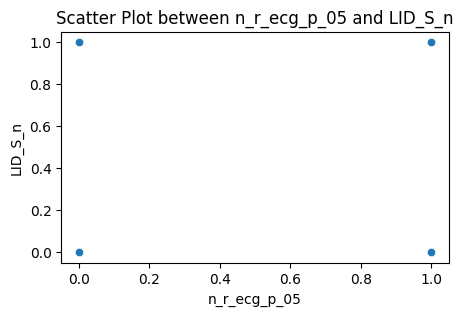

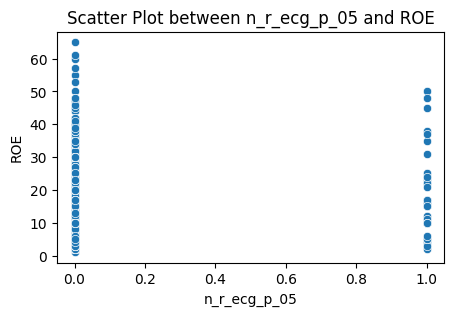

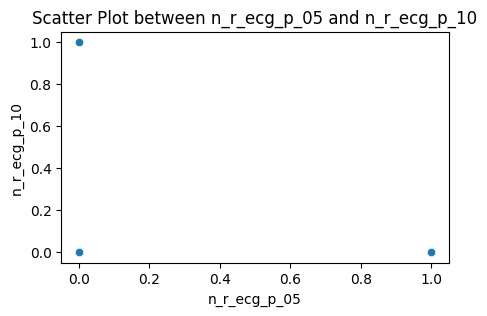

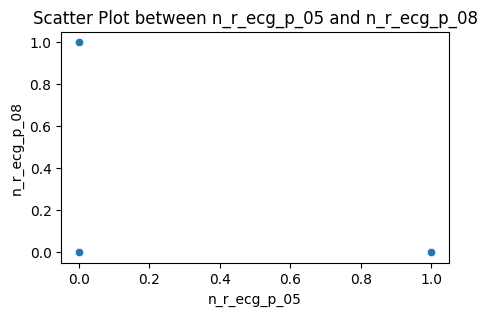

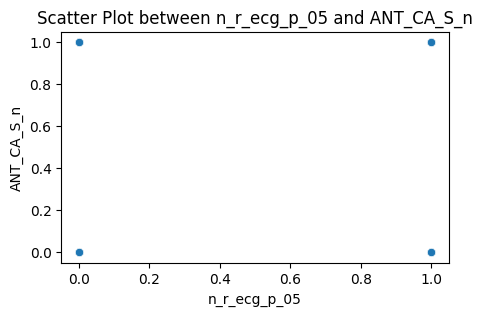

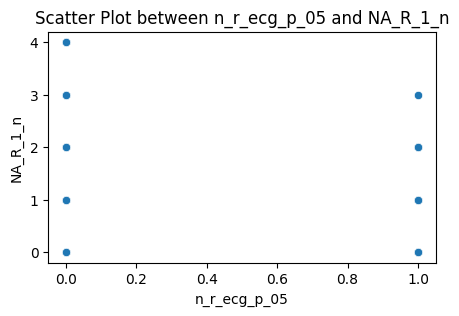

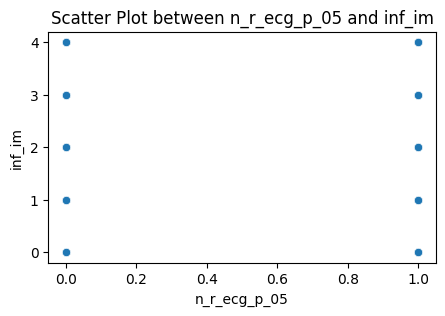

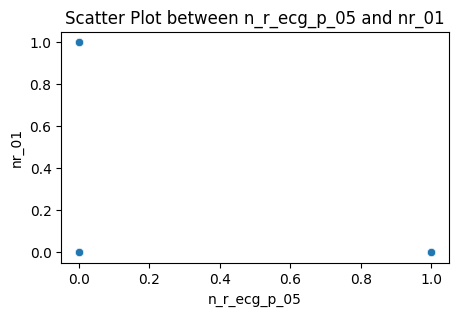

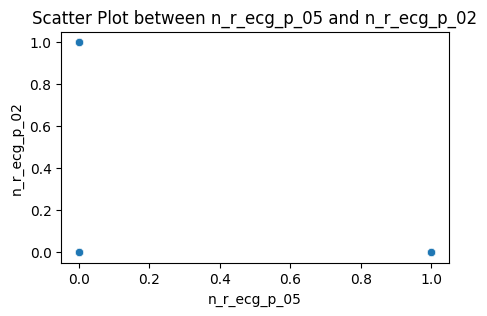

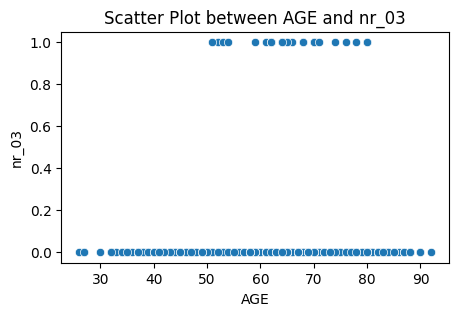

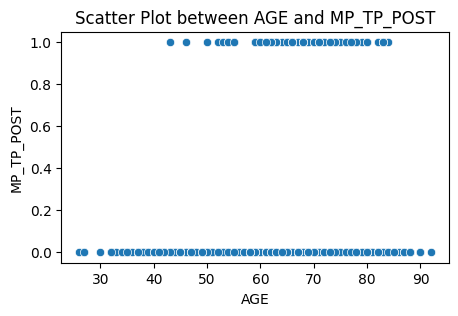

In [10]:
import itertools

# Selecting a few top pairs to plot (e.g., top 5 pairs)
top_pairs = list(itertools.combinations(top_correlated_features, 2))[:25]

# Plotting scatter plots for these pairs
for pair in top_pairs:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=X_train[pair[0]], y=X_train[pair[1]])
    plt.title(f'Scatter Plot between {pair[0]} and {pair[1]}')
    plt.show()


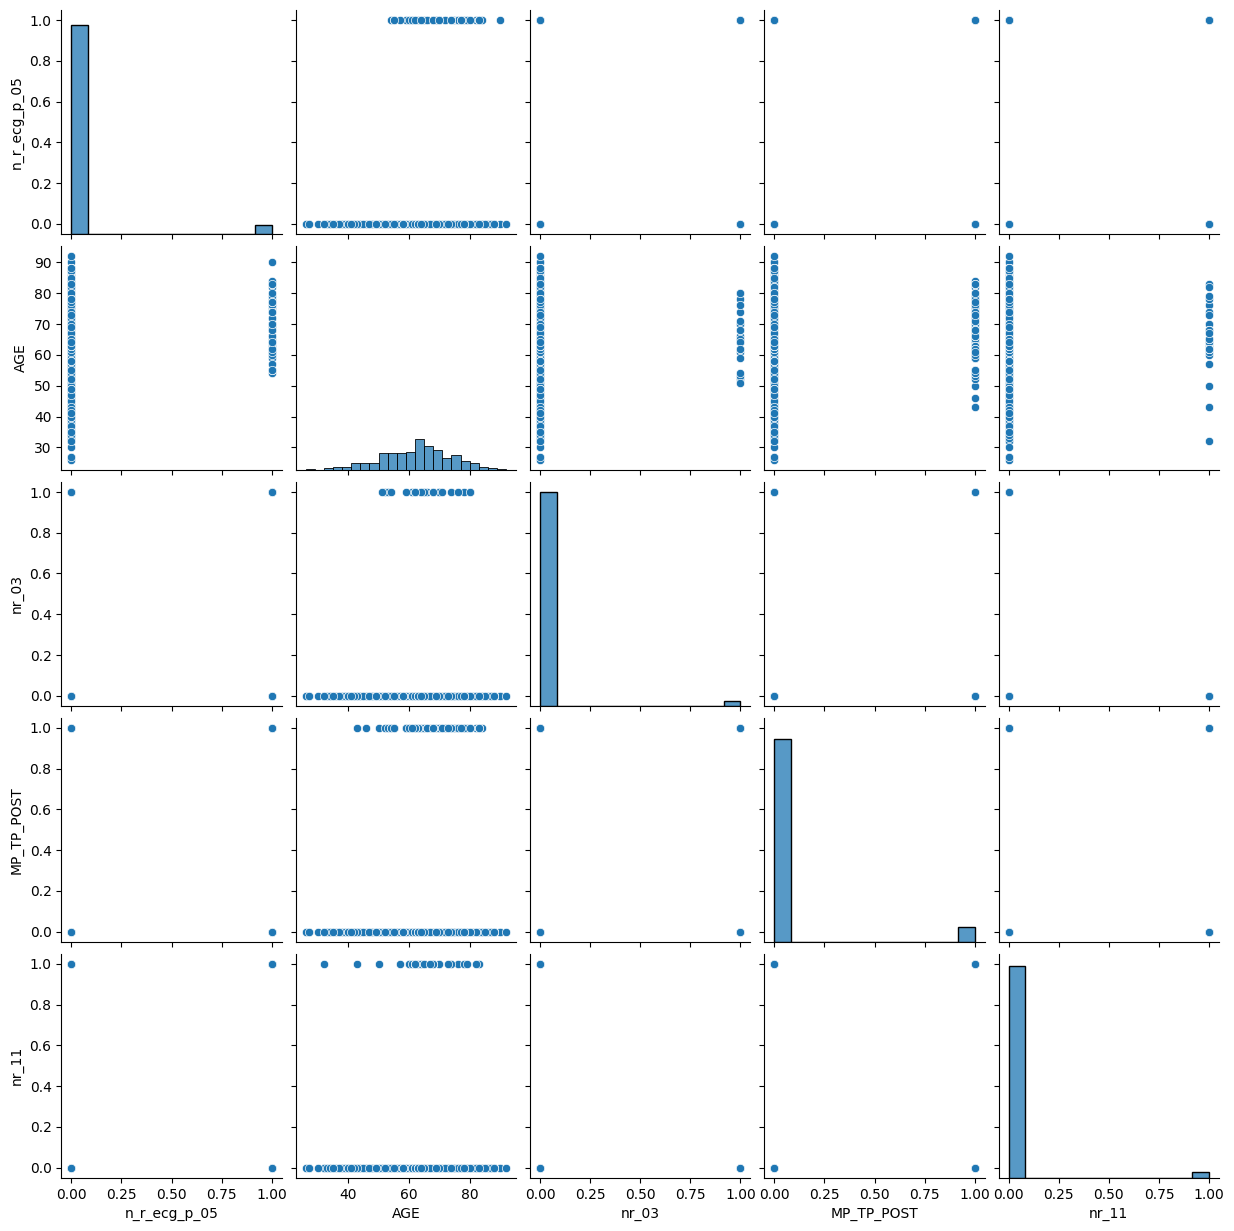

In [11]:
# Selecting a subset of top correlated features to avoid a very large pair plot
# Adjust the number of features as needed based on visualization clarity
subset_of_features = top_correlated_features[:5]

# Creating pair plot
sns.pairplot(X_train[subset_of_features])
plt.show()


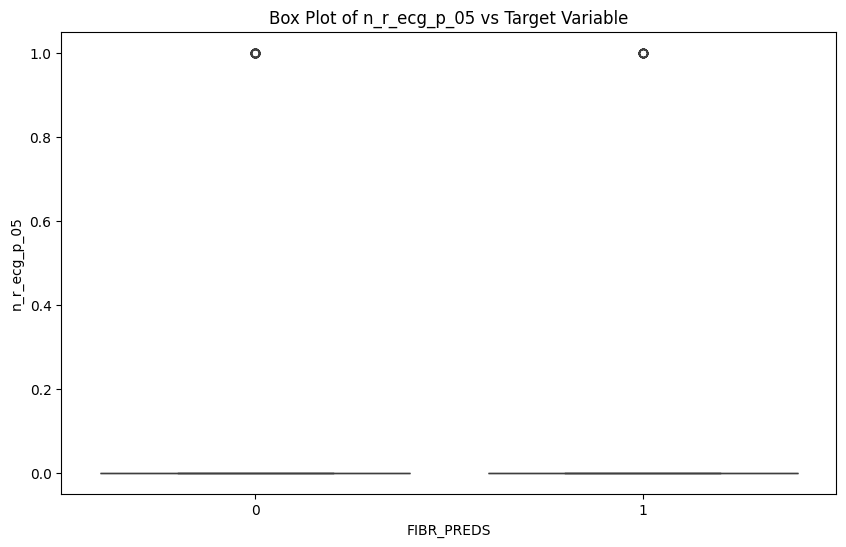

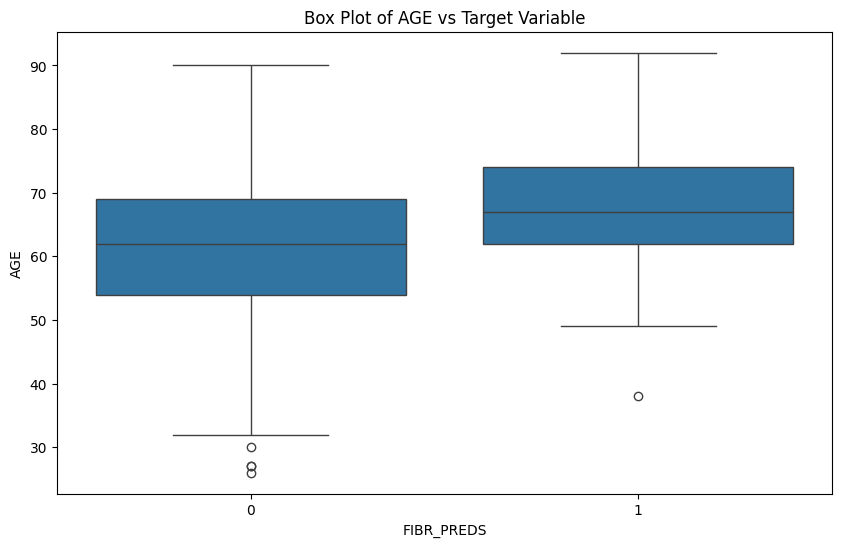

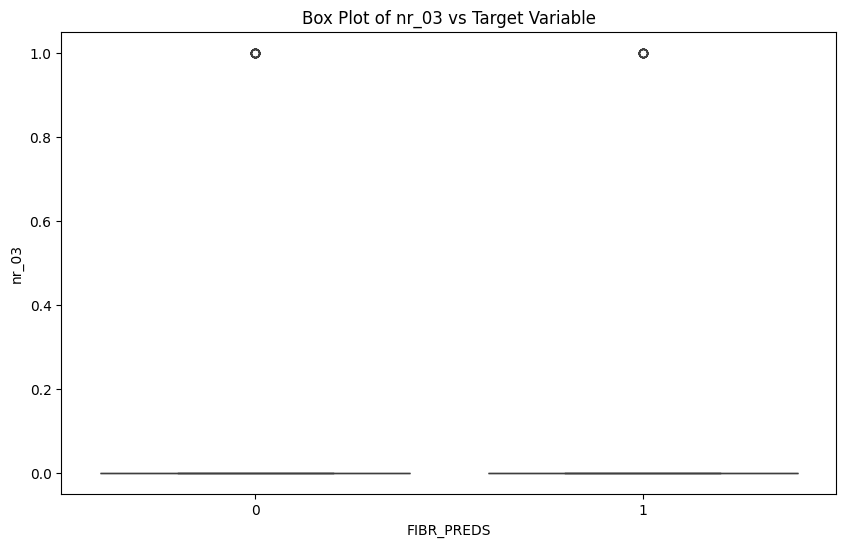

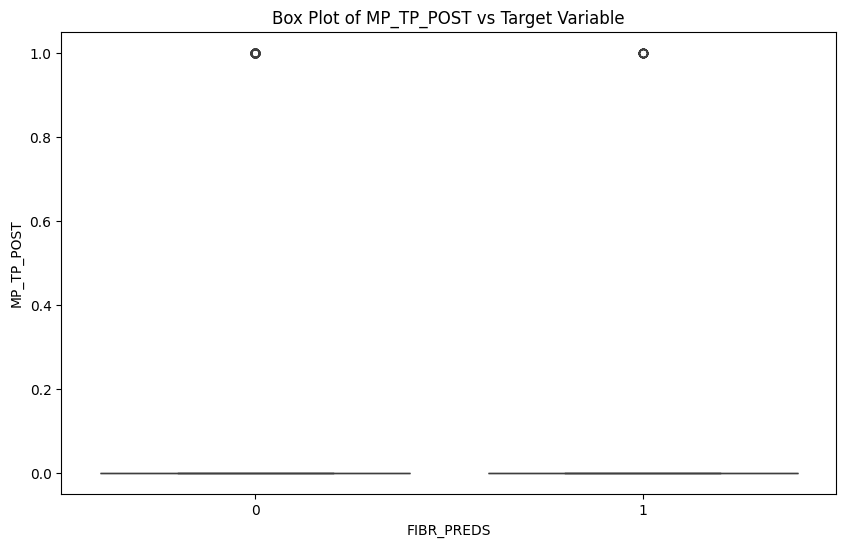

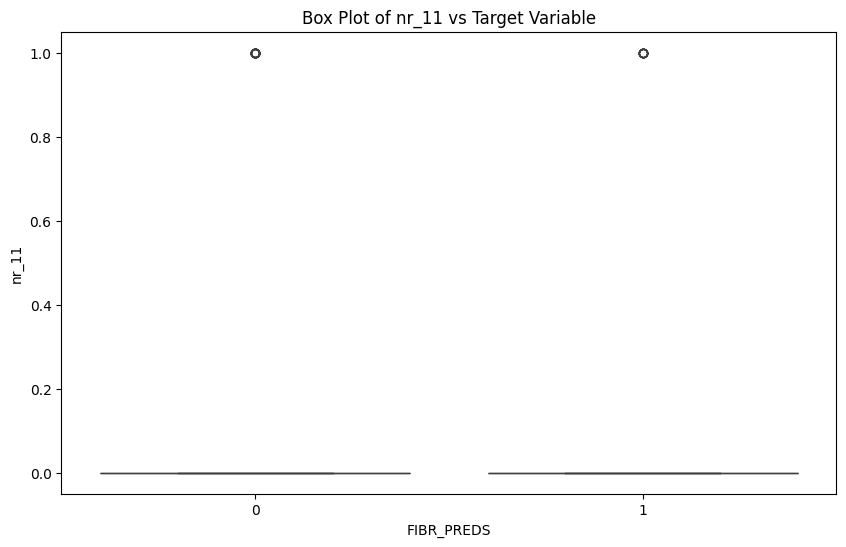

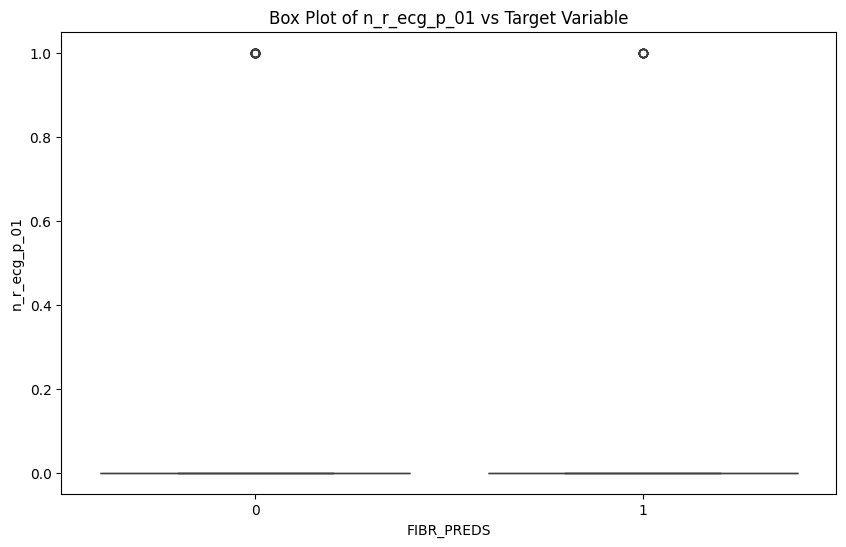

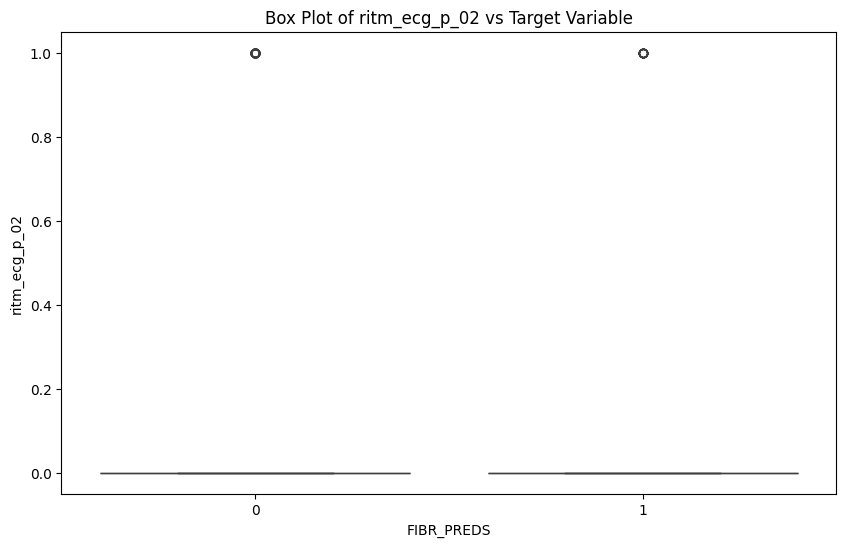

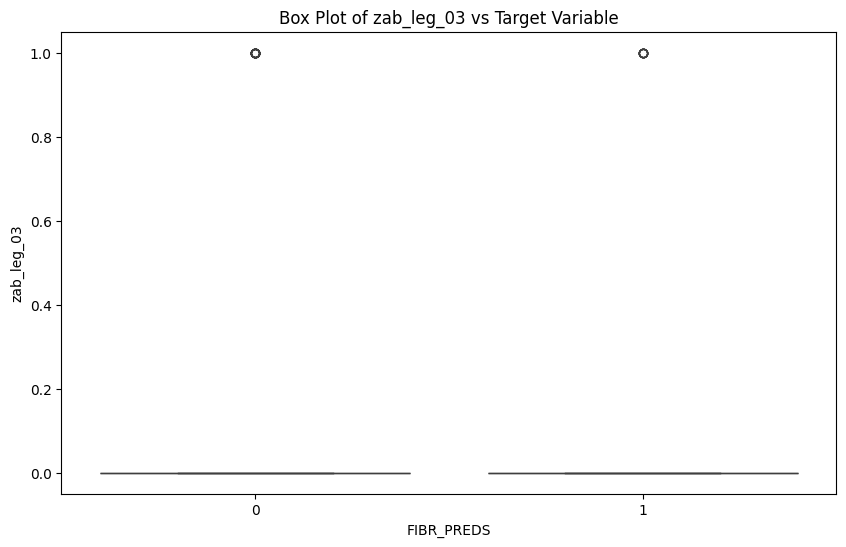

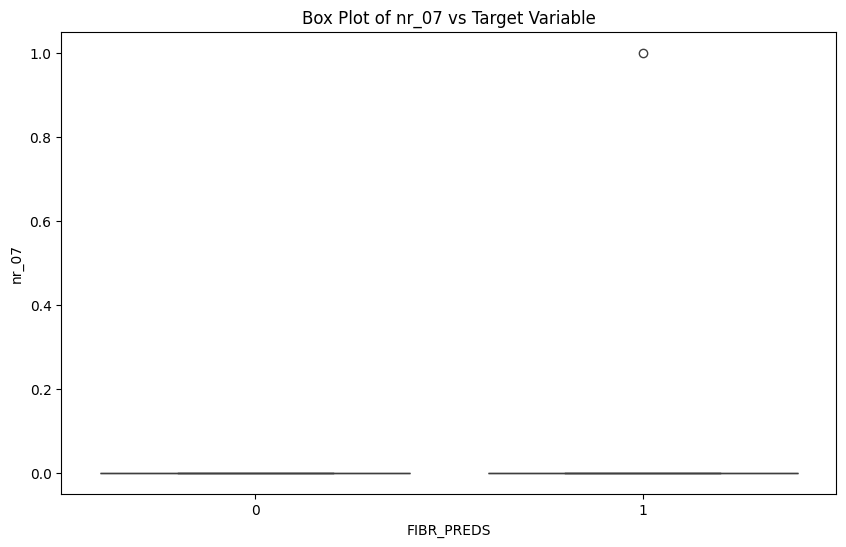

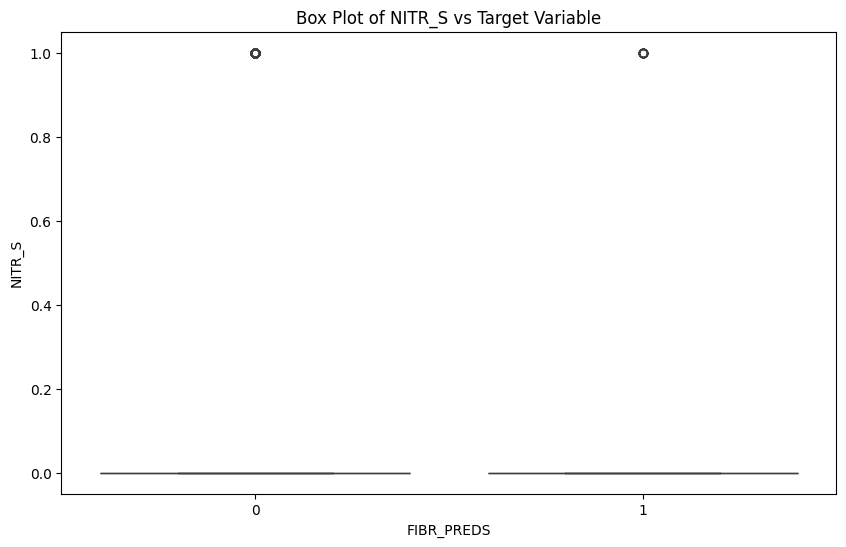

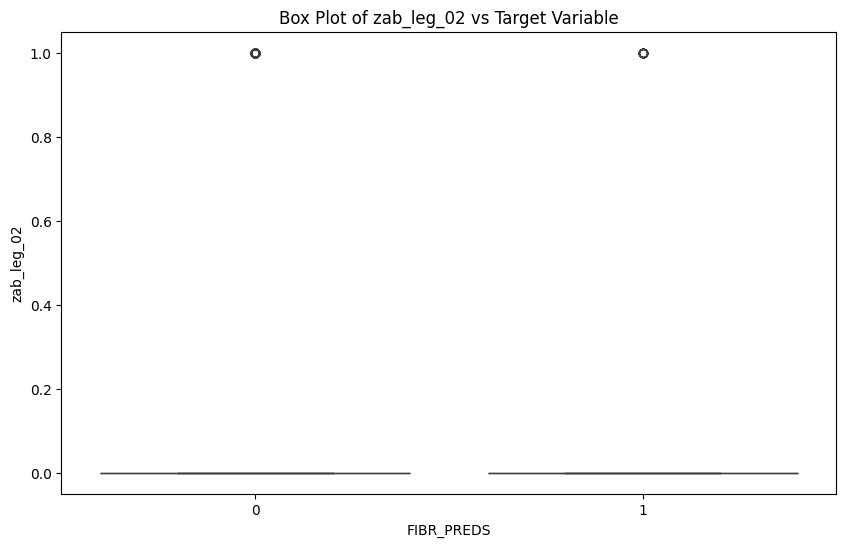

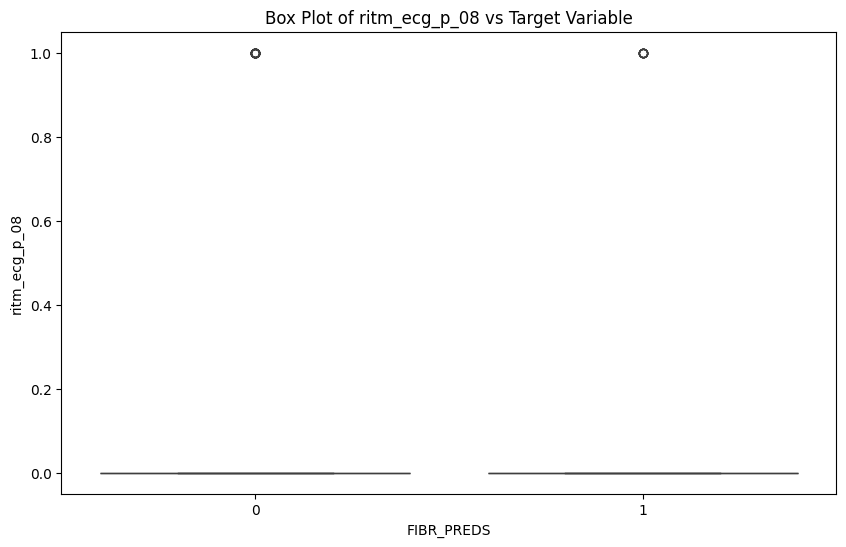

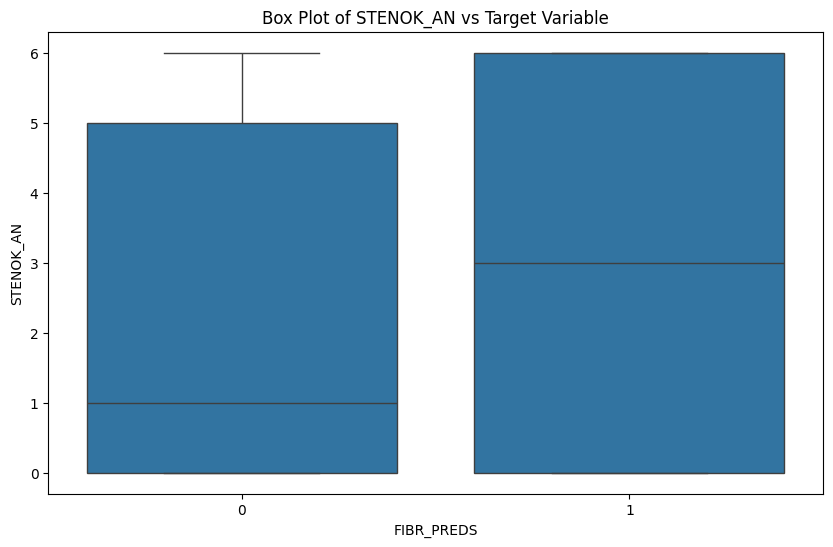

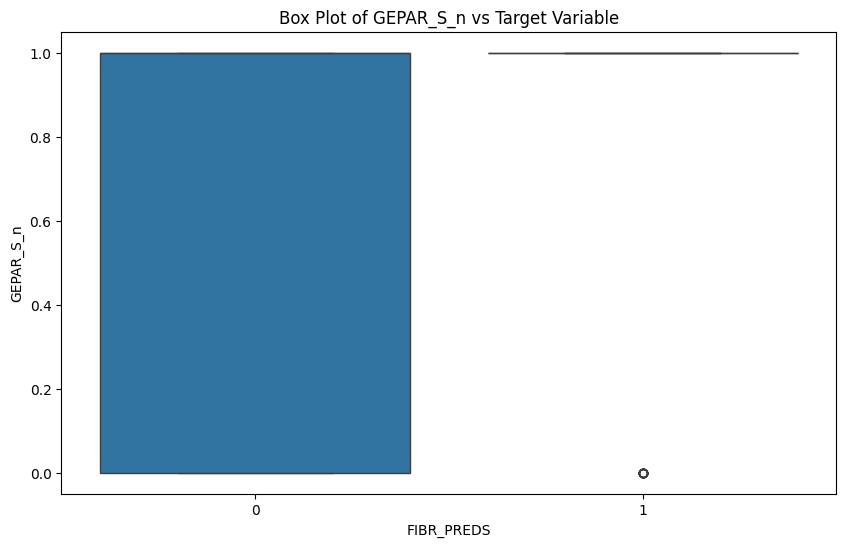

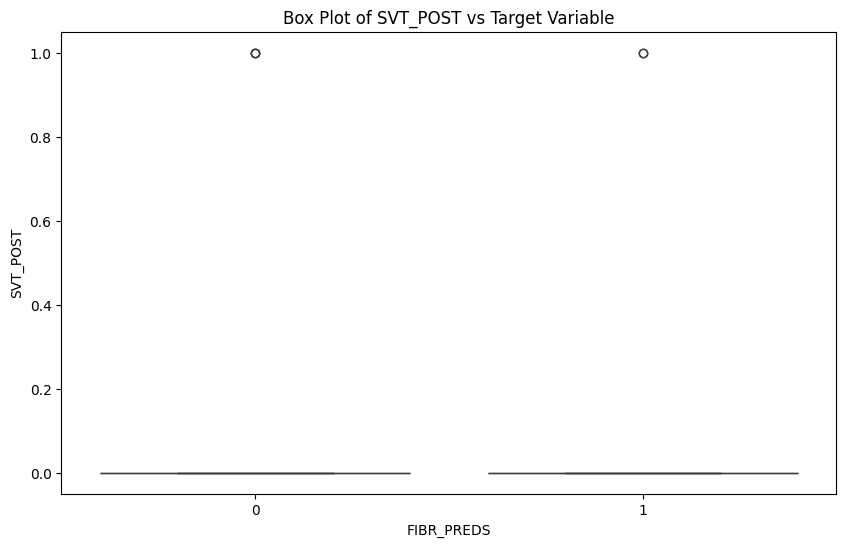

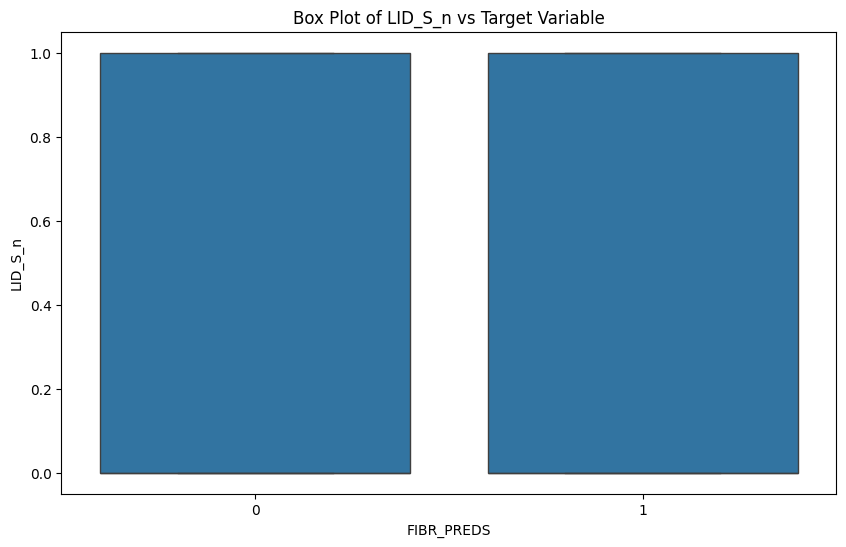

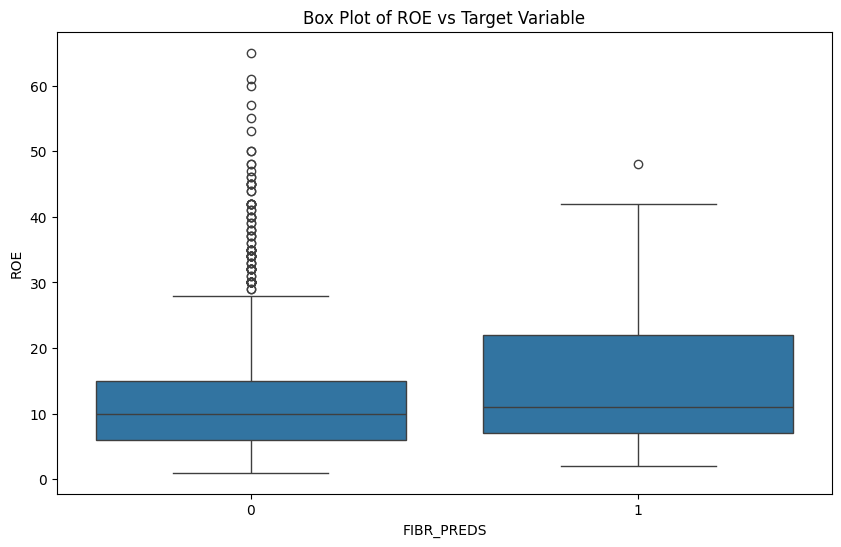

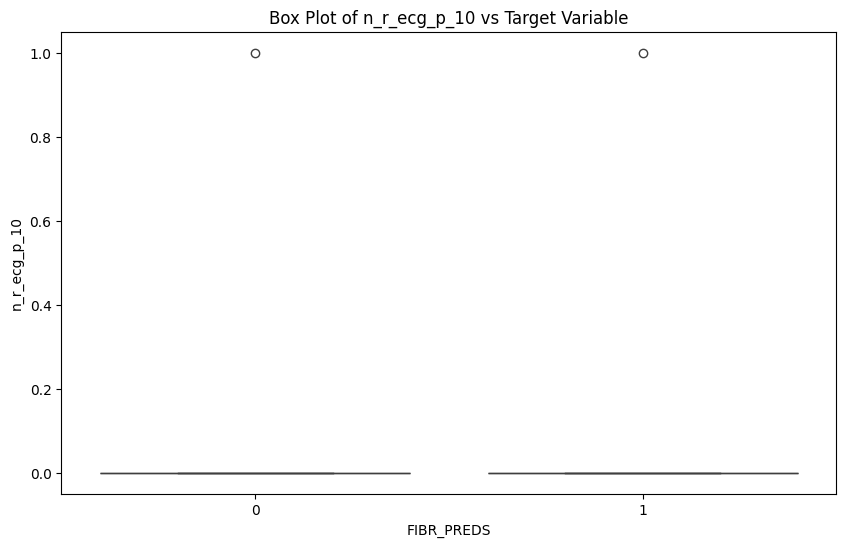

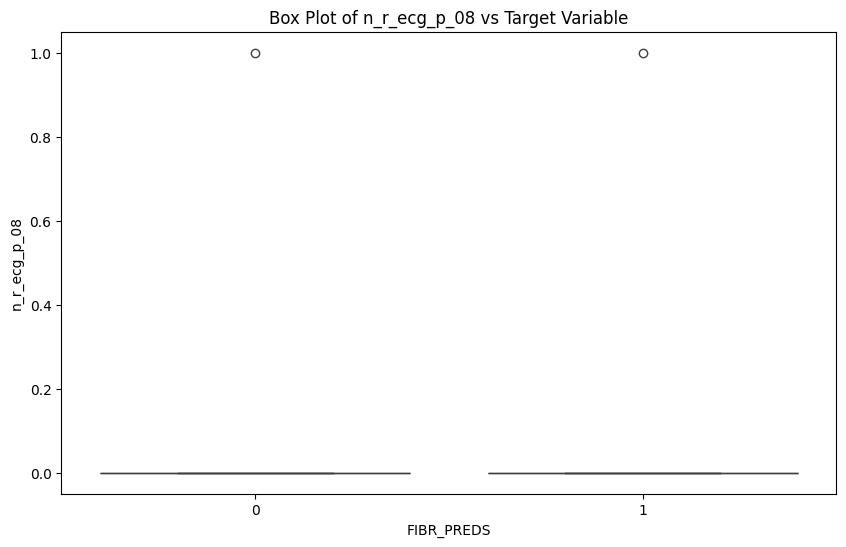

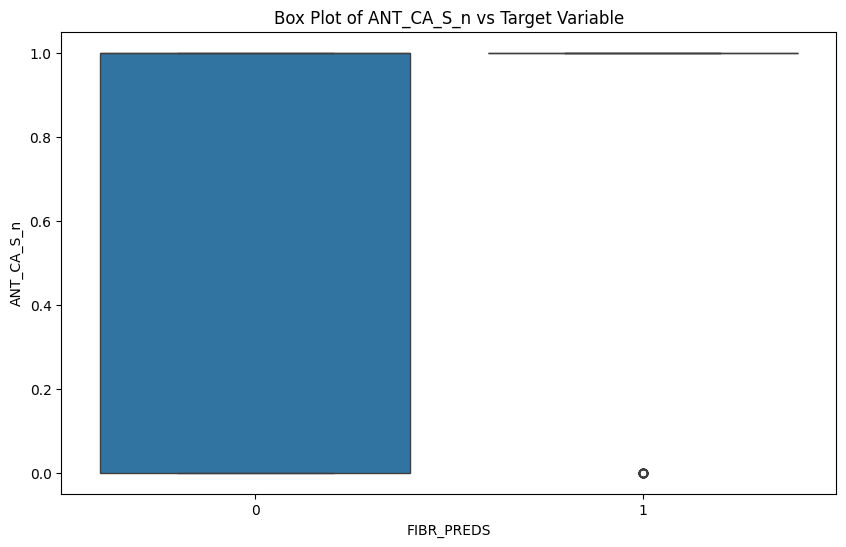

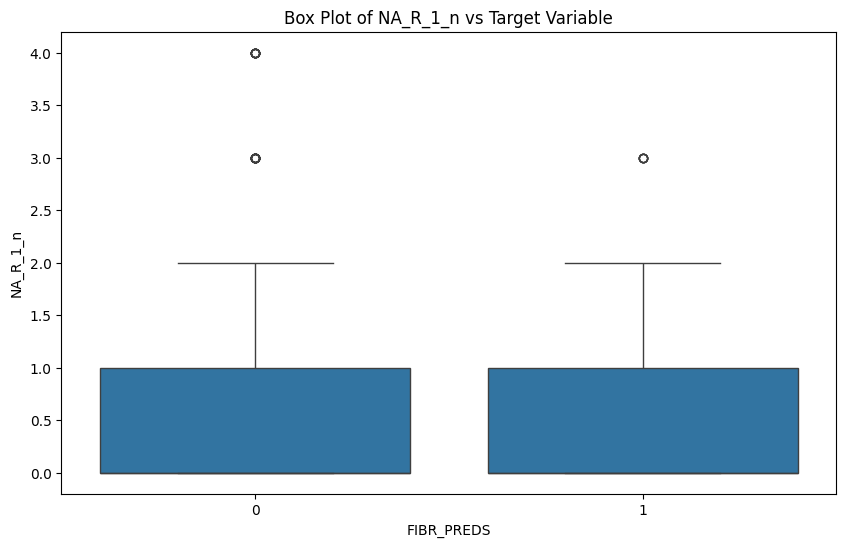

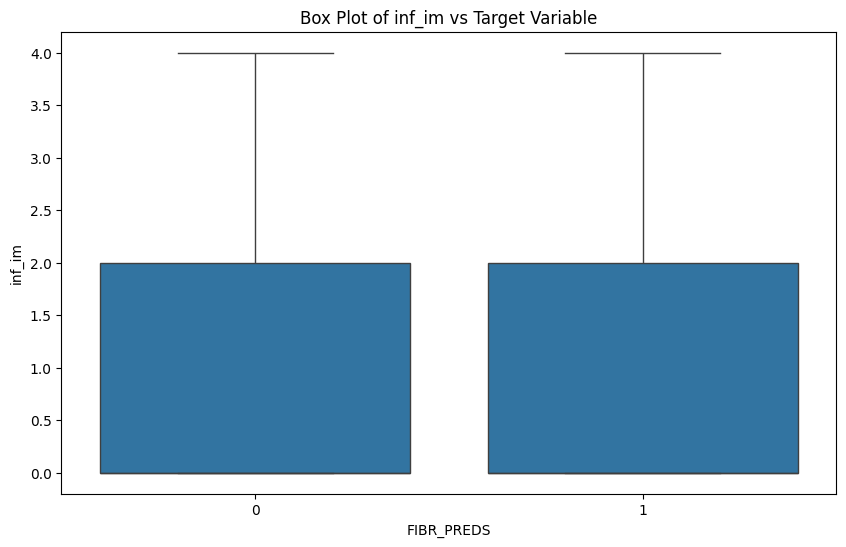

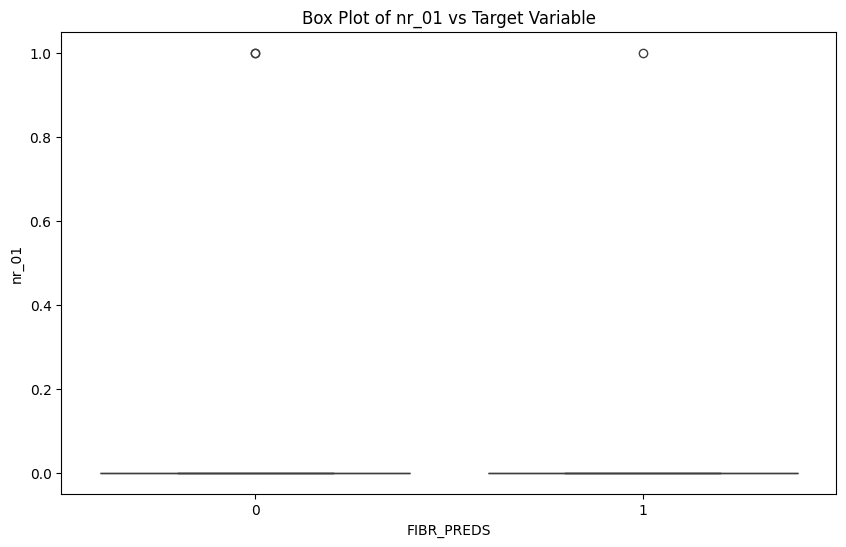

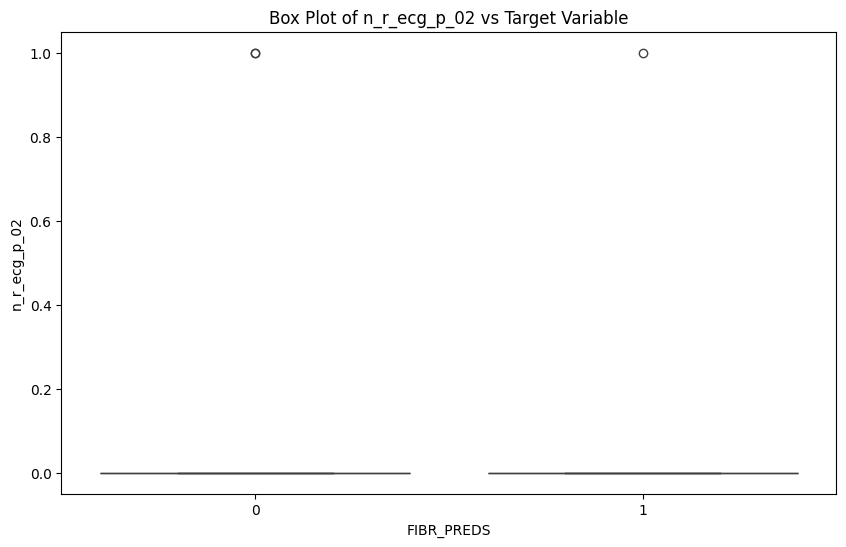

In [12]:
# Extracting the first column as the target variable
# Adjust the index [0] if the target variable is in a different column
target_variable = y_train.iloc[:, 0]

# Looping through each of the top correlated features to create box plots
for feature in top_correlated_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_variable, y=X_train[feature])
    plt.title(f'Box Plot of {feature} vs Target Variable')
    plt.show()


## Binary Classification Model Development

### • Implement the Naive Bayes classifier. Document the mathematical formulation and programming logic used if you develop from scratch. 
### • Optimize the model by experimenting with different techniques like feature selection and hyperparameter tuning. 

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB

# Initialize SMOTE
smote = SMOTE()

# Select one target variable for demonstration purposes
target_variable_name = 'FIBR_PREDS'
y = y_train[target_variable_name]
X_resampled, y_resampled = smote.fit_resample(X_train, y)

# Split the resampled data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the classifier on the resampled data
gnb.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_resampled = gnb.predict(X_test_resampled)

# Evaluate the classifier
print(f'\nClassification Report for {target_variable_name} after resampling:')
print(classification_report(y_test_resampled, y_pred_resampled))



Classification Report for FIBR_PREDS after resampling:
              precision    recall  f1-score   support

           0       0.89      0.19      0.31       327
           1       0.54      0.97      0.70       320

    accuracy                           0.58       647
   macro avg       0.71      0.58      0.50       647
weighted avg       0.72      0.58      0.50       647



In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# List of target variables
target_variables = ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 
                    'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Dictionary to hold the resampled training data for each target variable
resampled_data = {}
 
# Loop over each target variable
for target in target_variables:
    # Resample the data
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train[target])
    
    # Store the resampled data in the dictionary
    resampled_data[target] = (X_resampled, y_resampled)
    
    print(f"Before resampling, the class distribution for {target} is:")
    print(sorted(Counter(y_train[target]).items()))
    
    # Just to verify the balancing process
    print(f"After resampling, the class distribution for {target} is:")
    print(sorted(Counter(y_resampled).items()))


Before resampling, the class distribution for FIBR_PREDS is:
[(0, 1077), (1, 113)]
After resampling, the class distribution for FIBR_PREDS is:
[(0, 1077), (1, 1077)]
Before resampling, the class distribution for PREDS_TAH is:
[(0, 1175), (1, 15)]
After resampling, the class distribution for PREDS_TAH is:
[(0, 1175), (1, 1175)]
Before resampling, the class distribution for JELUD_TAH is:
[(0, 1157), (1, 33)]
After resampling, the class distribution for JELUD_TAH is:
[(0, 1157), (1, 1157)]
Before resampling, the class distribution for FIBR_JELUD is:
[(0, 1144), (1, 46)]
After resampling, the class distribution for FIBR_JELUD is:
[(0, 1144), (1, 1144)]
Before resampling, the class distribution for A_V_BLOK is:
[(0, 1150), (1, 40)]
After resampling, the class distribution for A_V_BLOK is:
[(0, 1150), (1, 1150)]
Before resampling, the class distribution for OTEK_LANC is:
[(0, 1071), (1, 119)]
After resampling, the class distribution for OTEK_LANC is:
[(0, 1071), (1, 1071)]
Before resampling,

In [28]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

# Initialize a dictionary to hold the accuracy for each target
accuracy_scores_resampled = {}

# Loop over each target variable
for target in target_variables:
    # Fetch the resampled training data for the current target variable
    X_train_resampled, y_train_resampled = resampled_data[target]

    # Fetch the original test data for the current target variable
    y_test_single = y_test[target]

    # Train the Naive Bayes classifier on the resampled data
    gnb = GaussianNB()
    gnb.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the original test data
    y_pred = gnb.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test_single, y_pred)
    accuracy_scores_resampled[target] = accuracy
    
    # Print the classification report
    print(f'\nClassification Report for {target} (Resampled Data):')
    print(classification_report(y_test_single, y_pred))

# Print the accuracy for each target variable using resampled data
print("\nAccuracy for each target variable with resampled data:")
for target, score in accuracy_scores_resampled.items():
    print(f"{target}: {score:.4f}")



Classification Report for FIBR_PREDS (Resampled Data):
              precision    recall  f1-score   support

           0       0.89      0.14      0.24       453
           1       0.11      0.86      0.20        57

    accuracy                           0.22       510
   macro avg       0.50      0.50      0.22       510
weighted avg       0.80      0.22      0.23       510


Classification Report for PREDS_TAH (Resampled Data):
              precision    recall  f1-score   support

           0       0.99      0.58      0.73       505
           1       0.00      0.20      0.01         5

    accuracy                           0.57       510
   macro avg       0.50      0.39      0.37       510
weighted avg       0.98      0.57      0.72       510


Classification Report for JELUD_TAH (Resampled Data):
              precision    recall  f1-score   support

           0       0.98      0.24      0.39       501
           1       0.02      0.78      0.04         9

    accuracy    

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize a dictionary to hold the accuracy for each target
accuracy_scores_kbest = {}

# Loop over each target variable
for target in target_variables:
    print(f"\nEvaluating target: {target}")

    # Select the current target variable
    y_train_single = y_train[target]
    y_test_single = y_test[target]

    # Perform feature selection
    kbest = SelectKBest(score_func=chi2, k='all')
    X_train_kbest = kbest.fit_transform(X_train, y_train_single)
    X_test_kbest = kbest.transform(X_test)

    # Train the Naive Bayes classifier
    gnb = GaussianNB()
    gnb.fit(X_train_kbest, y_train_single)

    # Make predictions using the top k selected features
    y_pred_kbest = gnb.predict(X_test_kbest)

    # Evaluate the classifier
    accuracy_kbest = accuracy_score(y_test_single, y_pred_kbest)
    accuracy_scores_kbest[target] = accuracy_kbest

    # Print the classification report
    print(f'Classification Report for {target} with k best features:')
    print(classification_report(y_test_single, y_pred_kbest))

# Print the accuracy for each target variable with k best features
print("\nAccuracy for each target variable with k best features:")
for target, score in accuracy_scores_kbest.items():
    print(f"{target}: {score:.4f}")



Evaluating target: FIBR_PREDS
Classification Report for FIBR_PREDS with k best features:
              precision    recall  f1-score   support

           0       0.89      0.07      0.13       453
           1       0.11      0.93      0.20        57

    accuracy                           0.16       510
   macro avg       0.50      0.50      0.16       510
weighted avg       0.80      0.16      0.14       510


Evaluating target: PREDS_TAH
Classification Report for PREDS_TAH with k best features:
              precision    recall  f1-score   support

           0       0.99      0.58      0.73       505
           1       0.00      0.20      0.01         5

    accuracy                           0.57       510
   macro avg       0.50      0.39      0.37       510
weighted avg       0.98      0.57      0.72       510


Evaluating target: JELUD_TAH
Classification Report for JELUD_TAH with k best features:
              precision    recall  f1-score   support

           0       0.98  

## Code Implementation and Testing

### • Write clean, modular, and well-documented Python code for the entire classification process. 
### • Test the classifier on the test set and ensure your code produces reliable outputs.

## Performance Analysis

### • Evaluate the classifier using metrics such as accuracy, precision, recall, F1 score, and ROC curve. 
### • Draw a confusion matrix to understand true positives, true negatives, false positives, and false negatives. 

## Reflection and Insights

### • Reflect on the performance of the Naive Bayes classifier, providing an analysis of the results. 
### • Discuss any observed limitations and propose potential improvements or future work that could enhance the classifier's performance. 